In [88]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [89]:
# Read the CSV file into a pandas dataframe
sales_df = pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\sales_data_set.csv")
store_df = pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\stores_data_set.csv")
Feature_df= pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\Features_data_set.csv")
print(sales_df.head(5))
print(sales_df.shape)
print(store_df.head(5))
print(store_df.shape)
print(Feature_df.head(5))
print(Feature_df.shape)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
(421570, 5)
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
(45, 3)
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN 

Exploratory Data Analysis:

Piechart

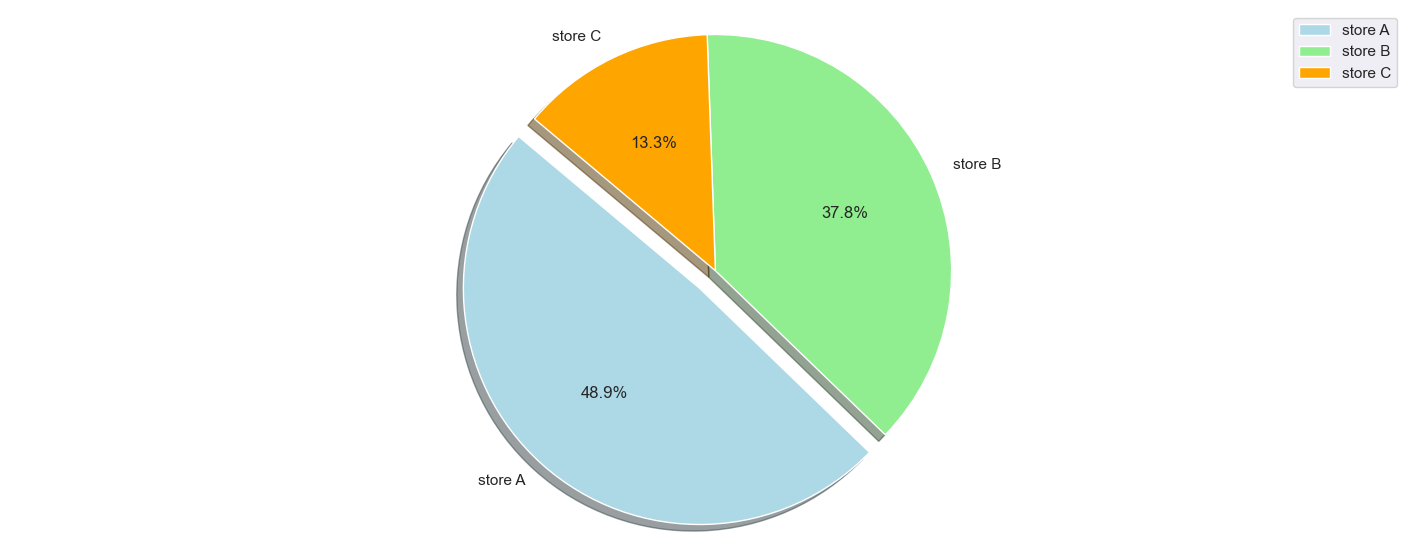

In [90]:
# #pie-chart for the visual representation of store types
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['lightblue', 'lightGreen', 'orange']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

Boxplot

c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


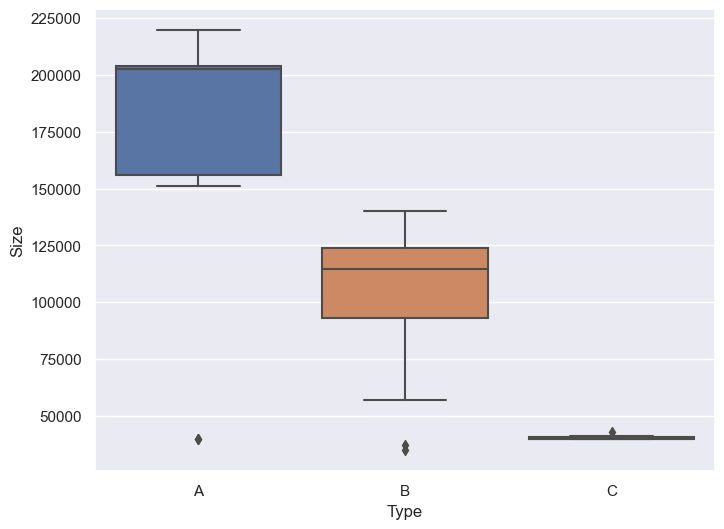

In [91]:
# boxplot for sizes of types of stores
store_type = pd.concat([store_df['Type'], store_df['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

In [92]:
sales_df=pd.merge(sales_df,store_df, on=['Store'], how='inner')
merge_df = pd.merge(sales_df, Feature_df, on=['Date','Store','IsHoliday'],how='inner')
merge_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


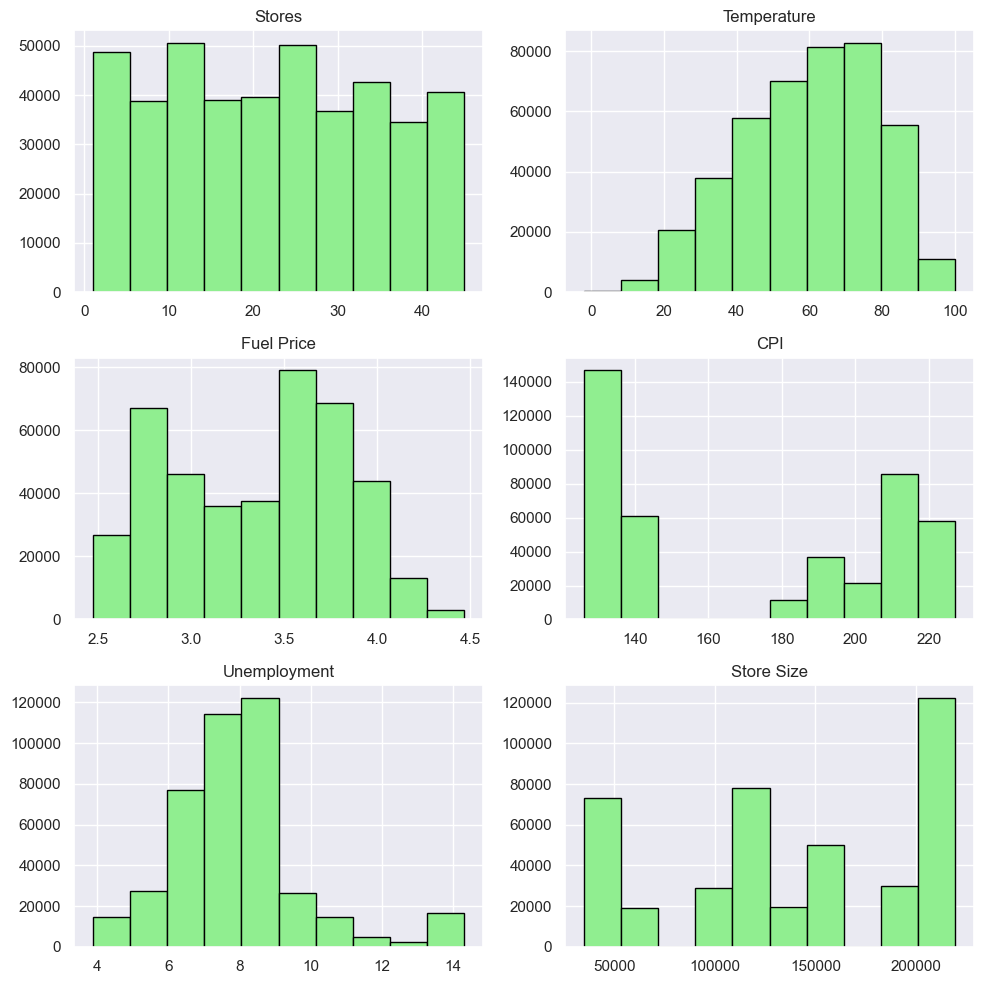

'Temperature, Fuel Price and Unemployment are fairly normally distributed. Store Sizes have brackets on both ends indicating  number of large and small stores. \nThe medium sized stores are very few in comparison in this dataset. We might need to do some transformation of this data'

In [93]:
plt.figure(figsize=(10, 10))

# Plot histograms for each variable
plt.subplot(3, 2, 1)
plt.hist(merge_df['Store'], color='lightgreen', edgecolor='black')
plt.title('Stores')

plt.subplot(3, 2, 2)
plt.hist(merge_df['Temperature'], color='lightgreen', edgecolor='black')
plt.title('Temperature')

plt.subplot(3, 2, 3)
plt.hist(merge_df['Fuel_Price'], color='lightgreen', edgecolor='black')
plt.title('Fuel Price')

plt.subplot(3, 2, 4)
plt.hist(merge_df['CPI'], color='lightgreen', edgecolor='black')
plt.title('CPI')

plt.subplot(3, 2, 5)
plt.hist(merge_df['Unemployment'], color='lightgreen', edgecolor='black')
plt.title('Unemployment')

plt.subplot(3, 2, 6)
plt.hist(merge_df['Size'], color='lightgreen', edgecolor='black')
plt.title('Store Size')

plt.tight_layout()
plt.show()
"""Temperature, Fuel Price and Unemployment are fairly normally distributed. Store Sizes have brackets on both ends indicating  number of large and small stores. 
The medium sized stores are very few in comparison in this dataset. We might need to do some transformation of this data"""

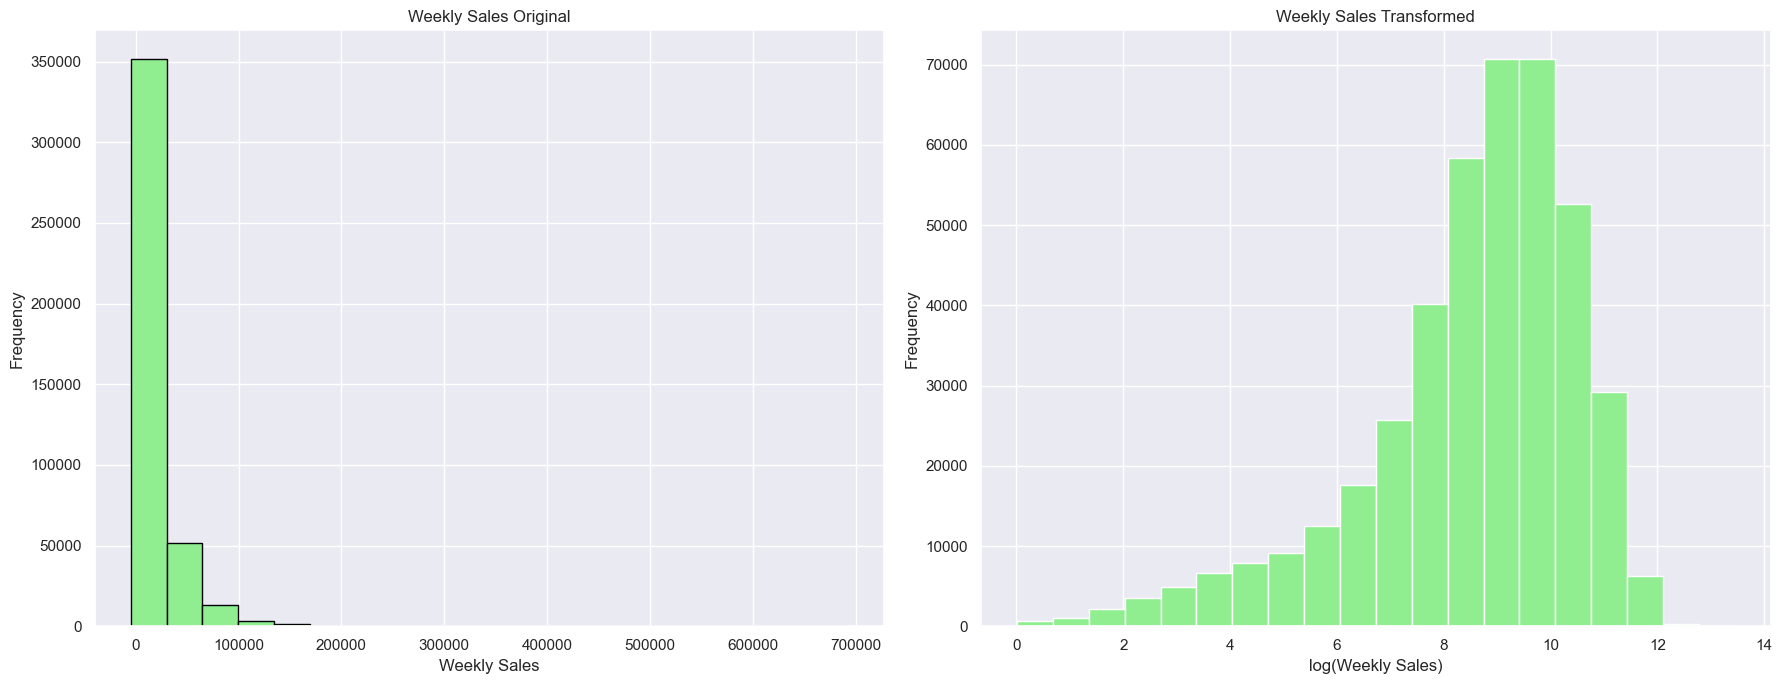

In [97]:
# Plot original Weekly Sales
plt.subplot(1, 2, 1)
plt.hist(merge_df['Weekly_Sales'], color='lightgreen', edgecolor='black', bins=20)
plt.title('Weekly Sales Original')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')

# Filter out non-positive values and apply log transformation
log_transformed_sales = np.log1p(merge_df['Weekly_Sales'][merge_df['Weekly_Sales'] > 0])

# Transformed Weekly Sales histogram (log scale)
plt.subplot(1, 2, 2)
plt.hist(log_transformed_sales, color='lightgreen', bins=20)
plt.title('Weekly Sales Transformed')
plt.xlabel('log(Weekly Sales)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Weekly Sales is positively skewed indicating few large values. This could be caused by the festive Weeks which are few but Sales value for these weeks would be very high in comparison to other weeks

We can transform it using a log transformation as can be seem from the second plot. This might be required when we build the model too

In [8]:
print(merge_df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [9]:
merge_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merge_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

In [10]:
print(merge_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [11]:
# Filter only numeric columns
numeric_columns = merge_df.select_dtypes(include=['number'])

# Check for negative values in numeric columns
negative_values = (numeric_columns < 0).any()

# Print columns with negative values
columns_with_negatives = negative_values[negative_values].index
print("Columns with negative values:", columns_with_negatives)

Columns with negative values: Index(['Weekly_Sales', 'Temperature', 'MarkDown2', 'MarkDown3'], dtype='object')


In [12]:
#1 negative Value Cleaning for both train and test dataset
merge_df.loc[merge_df['Weekly_Sales'] < 0 ,'Weekly_Sales'] = 0
merge_df.loc[merge_df['MarkDown2'] < 0 ,'MarkDown2'] = 0
merge_df.loc[merge_df['MarkDown3'] < 0, 'MarkDown3'] = 0
#Since sales and promotional offers (Markdown 2 and 3) cannot be negative, we will replace negative values with 0

In [13]:
# Filter only numeric columns
numeric_columns = merge_df.select_dtypes(include=['number'])

# Check for negative values in numeric columns
negative_values = (numeric_columns < 0).any()

# Print columns with negative values
columns_with_negatives = negative_values[negative_values].index
print("Columns with negative values:", columns_with_negatives)

Columns with negative values: Index(['Temperature'], dtype='object')


In [14]:
merge_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.467250,136727.915739,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.032446,60980.583328,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,0.000000,34875.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [15]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [16]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'], format='%d/%m/%Y')

In [17]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [18]:
#Categorical column
# Explore unique values of the 'Type' column
unique_types = merge_df['Type'].unique()
print("Unique values in 'Type':", unique_types)

# Explore unique values of the 'IsHoliday' column
unique_holidays = merge_df['IsHoliday'].unique()
print("Unique values in 'IsHoliday':", unique_holidays)

Unique values in 'Type': ['A' 'B' 'C']
Unique values in 'IsHoliday': [False  True]


<Axes: xlabel='Store'>

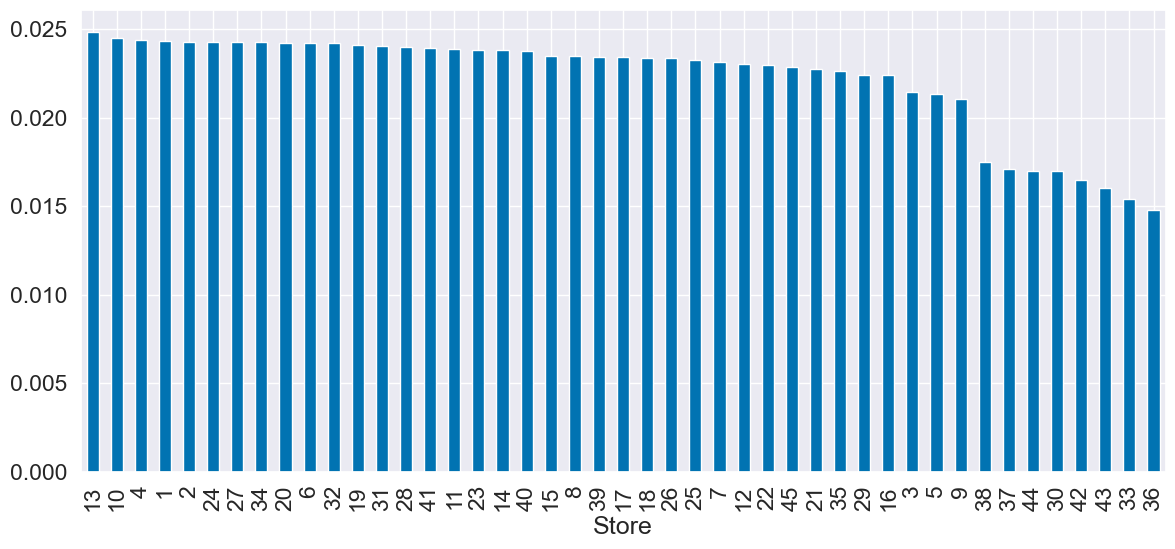

In [19]:
# EDA for Store
sns.set(rc={'figure.figsize':(14,6)}, palette="colorblind", font_scale=1.5)
merge_df['Store'].value_counts(normalize=True).plot(kind = 'bar')
#Store 13 is higher, store 36 less

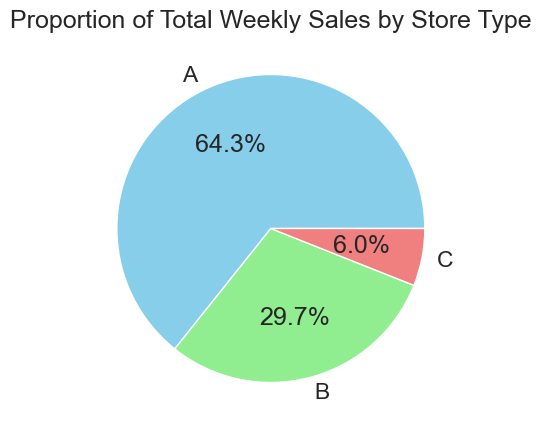

In [20]:
# Sales based on Store Type
total_sales_by_type = merge_df.groupby('Type')['Weekly_Sales'].sum()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_sales_by_type, labels=total_sales_by_type.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Total Weekly Sales by Store Type')
plt.show()

C:\Users\Pragadheesh\AppData\Local\Temp\ipykernel_45020\2842109997.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df.Weekly_Sales)
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

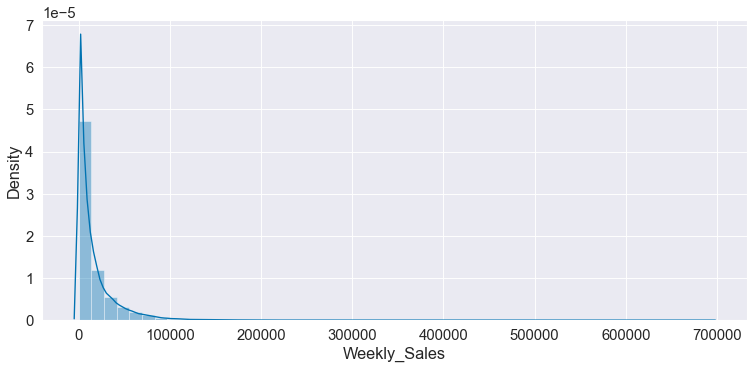

In [21]:
# Distribution of Weekly Sales-y variable

plt.figure(dpi=65)
sns.distplot(merge_df.Weekly_Sales)

In [22]:
# Convert 'Date' column to datetime type if not already done
merge_df['Date'] = pd.to_datetime(merge_df['Date'], format='%d/%m/%Y')

# Extract day, month, and year
merge_df['Day'] = merge_df['Date'].dt.day
merge_df['Month'] = merge_df['Date'].dt.month
merge_df['Year'] = merge_df['Date'].dt.year

# Display the updated DataFrame
print(merge_df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     2 2010-02-05      50605.27      False    A  151315        42.31   
2      1     3 2010-02-05      13740.12      False    A  151315        42.31   
3      1     4 2010-02-05      39954.04      False    A  151315        42.31   
4      1     5 2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Day  Month  Year  
0  211.096358         8.106    5      

c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

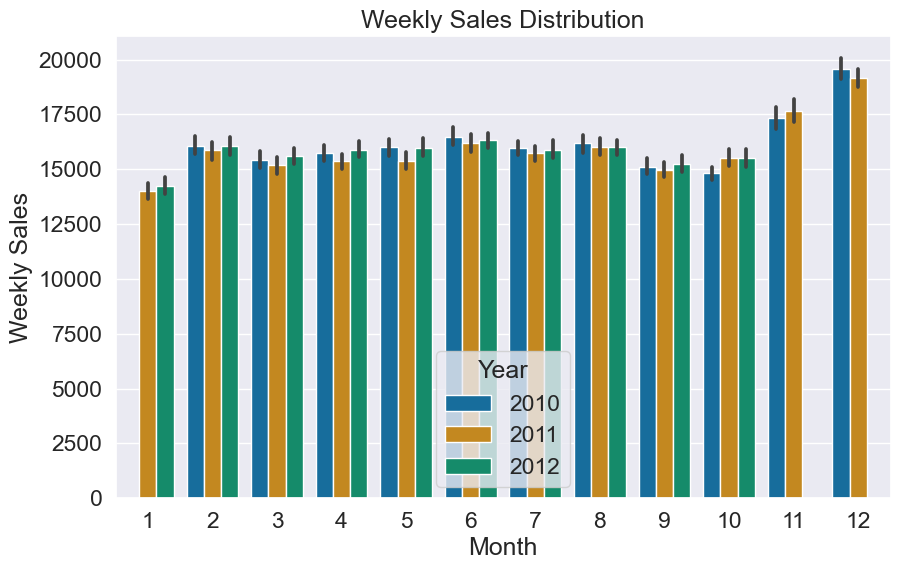

In [23]:
plt.figure(figsize=(10, 6))

# Create a bar plot with facets based on the 'Year' column
sns.barplot(data=merge_df, x='Month', y='Weekly_Sales', hue='Year')

plt.title('Weekly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.legend(title='Year')

plt.show()

Training Data is missing for January in 2010, November and December in 2012.There are weeks when Sales peaks in the festive months of November and December.Also seems like there is a dip in September - October leading towards the holiday weeks/

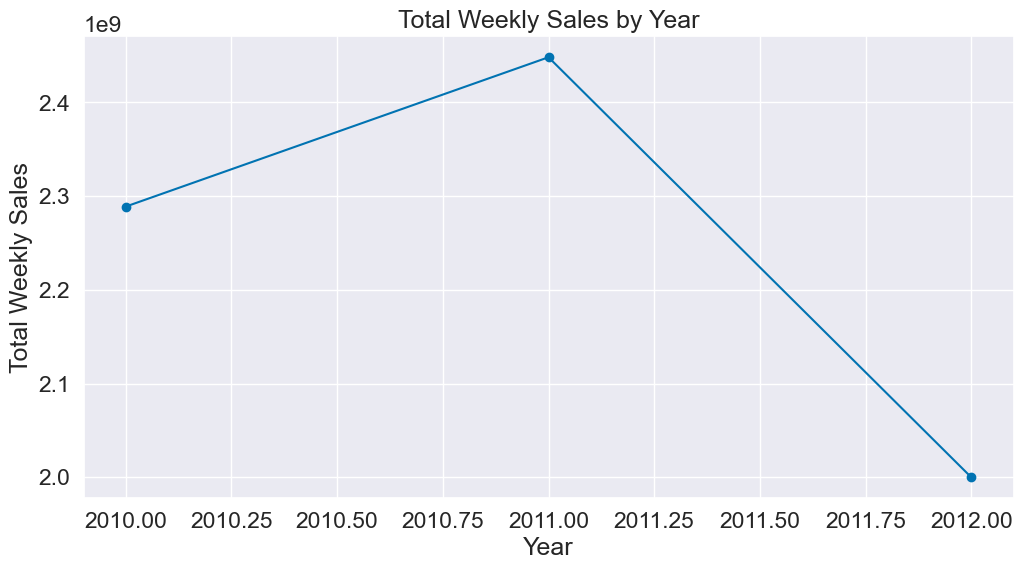

"This line groups the DataFrame by the 'Year' column and calculates the sum of 'Weekly_Sales' for each year.\n The result is a Pandas Series where the index is the years and the values are the total weekly sales for each year."

In [24]:
sales_by_year = merge_df.groupby('Year')['Weekly_Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Year')
plt.show()
"""This line groups the DataFrame by the 'Year' column and calculates the sum of 'Weekly_Sales' for each year.
 The result is a Pandas Series where the index is the years and the values are the total weekly sales for each year."""

In [25]:
monthly_sales = pd.pivot_table(merge_df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales = monthly_sales.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

Year,2010,2011,2012
Month,,,
1,NaN,13997.896986,14252.866445
2,16077.035143,15870.253143,16077.784330
3,15432.946335,15183.273355,15590.155721
4,15745.662205,15362.071179,15890.545185
5,15996.538303,15367.941473,15967.610616
6,16486.314419,16188.259366,16309.333736
7,15972.986493,15724.984548,15893.480775
8,16171.814011,16030.736291,16002.614323
9,15120.410781,14962.091468,15239.412653


<Axes: xlabel='Month'>

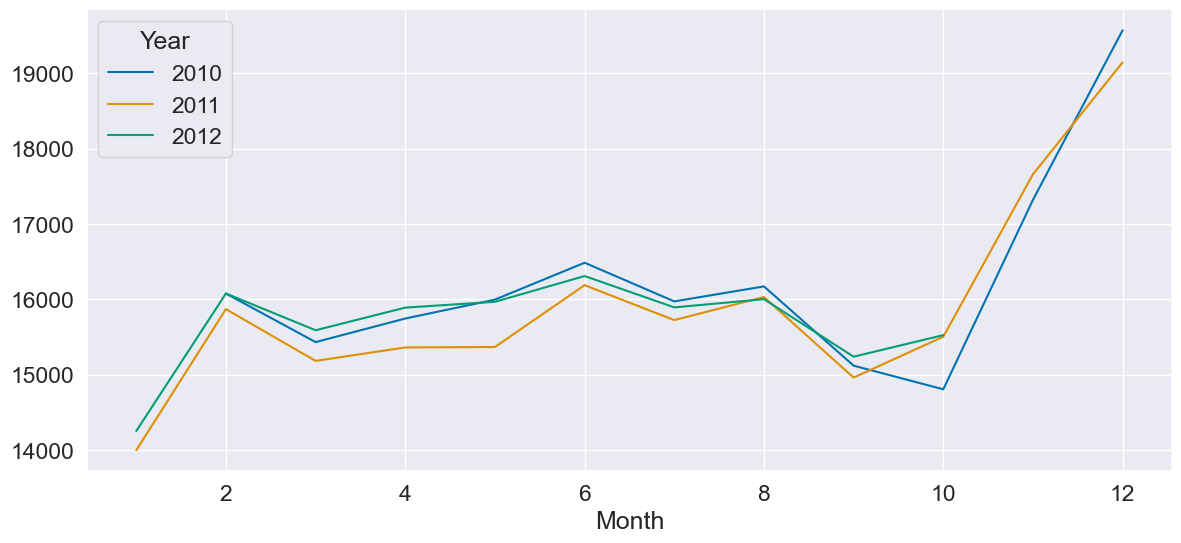

In [26]:
monthly_sales.plot()

# Time series analysis
 using the seasonal_decompose function from the statsmodels library in Python. three main components: trend, seasonality, and residual 

In [27]:
sales_df=merge_df.groupby('Date')['Weekly_Sales'].sum()
sales_df.head()

Date
2010-02-05    49750875.98
2010-02-12    48336800.10
2010-02-19    48277902.33
2010-02-26    43970440.65
2010-03-05    46872715.16
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Weekly_Sales')

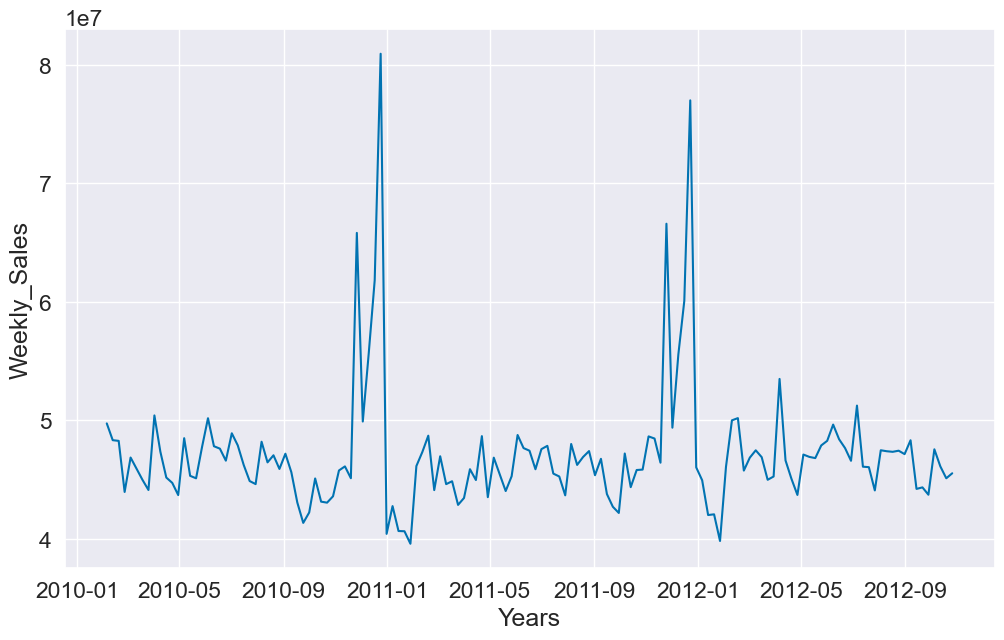

In [28]:
plt.figure(figsize=(12, 7))
plt.plot(sales_df)
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')

In [29]:
decomposition = sm.tsa.seasonal_decompose(sales_df, extrapolate_trend=8)

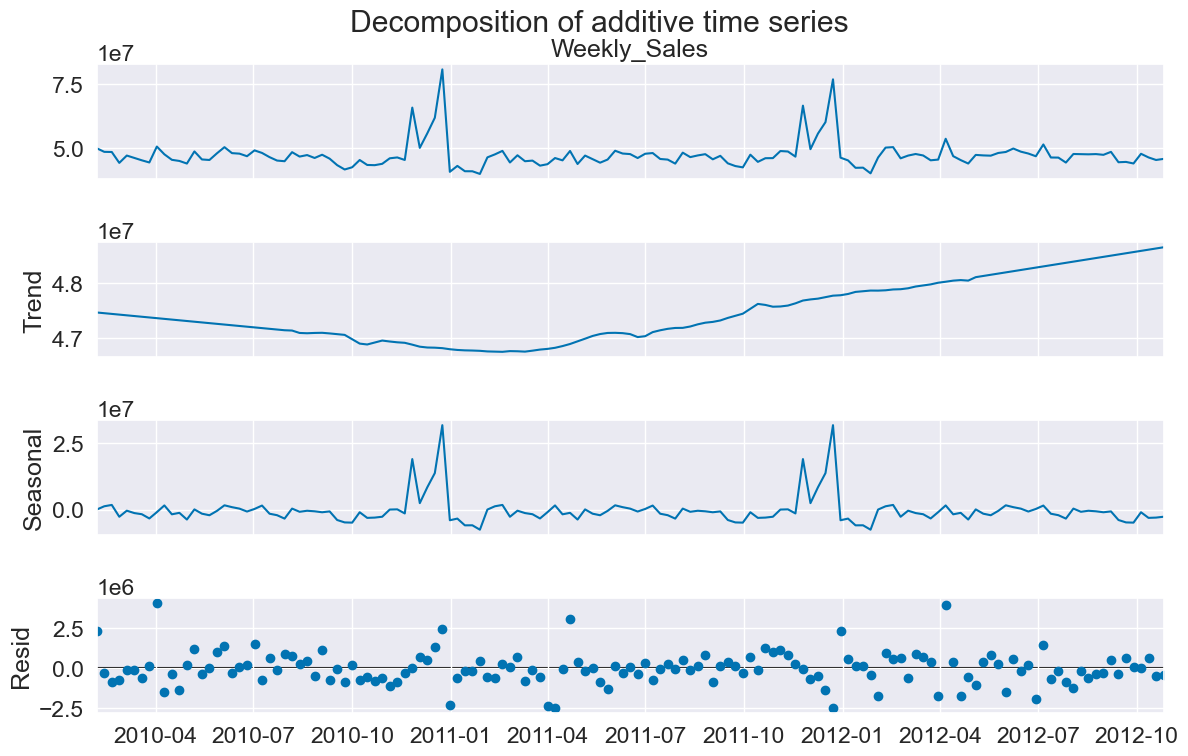

In [30]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [31]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [32]:
# Rename the columns for clarity
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']

In [33]:
# Calculate the Time Series of Interest (TSI)
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular

In [34]:
decomp_output

,observed,Trend,Seasonal,Irregular,TSI
Date,,,,,
2010-02-05,49750875.98,4.746335e+07,-1.680494e+02,2.287695e+06,-1.824709e+16
2010-02-12,48336800.10,4.745029e+07,1.234651e+06,-3.481425e+05,-2.039577e+19
2010-02-19,48277902.33,4.743724e+07,1.737587e+06,-8.969197e+05,-7.392979e+19
2010-02-26,43970440.65,4.742418e+07,-2.704963e+06,-7.487747e+05,9.605331e+19
2010-03-05,46872715.16,4.741112e+07,-4.232382e+05,-1.151684e+05,2.310991e+18
...,...,...,...,...,...
2012-09-28,43735713.56,4.857394e+07,-4.909747e+06,7.151975e+04,-1.705644e+19
2012-10-05,47567053.49,4.859591e+07,-1.015556e+06,-1.330446e+04,6.566000e+17
2012-10-12,46128909.98,4.861789e+07,-3.124354e+06,6.353770e+05,-9.651344e+19


Department wise sales visualisation

c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


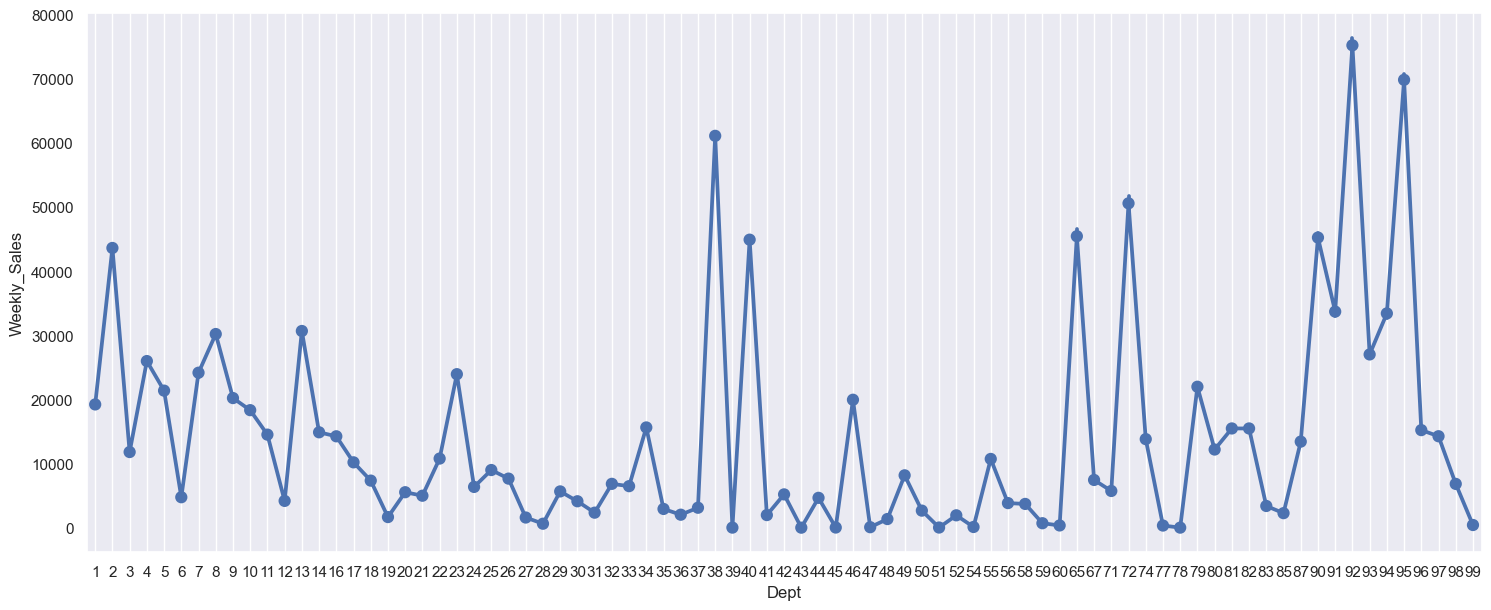

In [35]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,7)})
sns.pointplot(x='Dept', y='Weekly_Sales',data=merge_df)
plt.grid()
#Dept. with highest weekly sales is 92

Correlation Analysis:

In [36]:
# Exclude non-numeric columns ('Type' and other categorical columns) from correlation analysis
numeric_columns = merge_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = merge_df[numeric_columns].corr()

# Extract correlations with the target variable ('Weekly_Sales')
correlations_with_sales = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)

# Display the correlations
print("Correlation with Weekly Sales:")
print(correlations_with_sales)
# value of the correlation coefficient varies between +1 and -1.

Correlation with Weekly Sales:
Weekly_Sales    1.000000
Size            0.243830
Dept            0.148034
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020720
Fuel_Price     -0.000121
Temperature    -0.002312
CPI            -0.020923
Unemployment   -0.025860
Store          -0.085196
Name: Weekly_Sales, dtype: float64


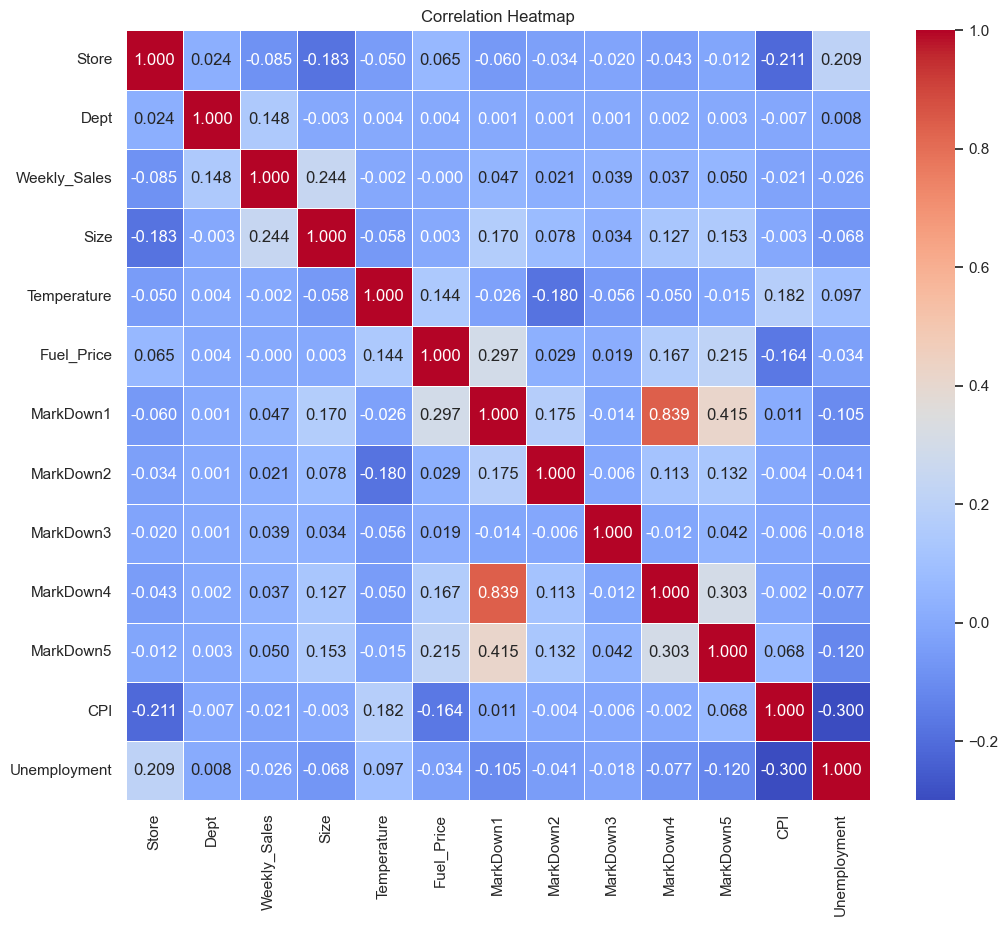

In [37]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Outlier Treatment

In [38]:
merge_df['Weekly_Sales'] = np.where(merge_df['Weekly_Sales']>100000,100000,merge_df['Weekly_Sales'])
#We cannot do this on test obviously

C:\Users\Pragadheesh\AppData\Local\Temp\ipykernel_45020\1624187609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df.Weekly_Sales)
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

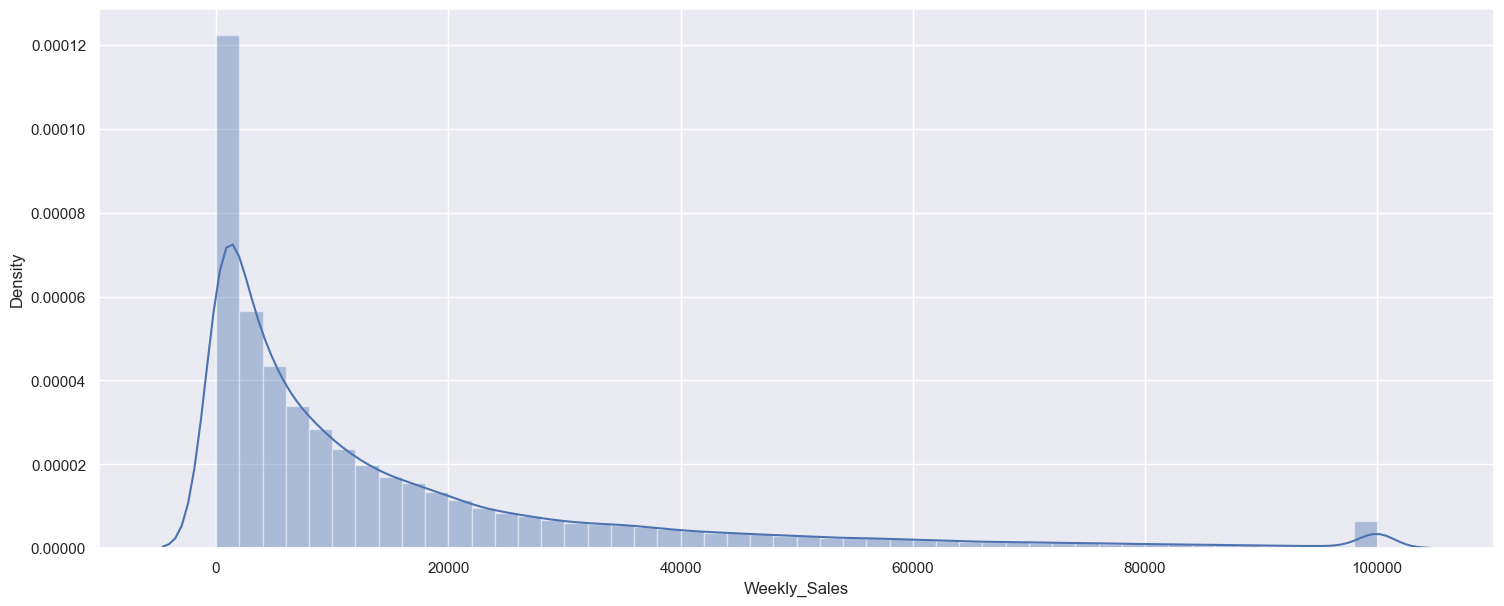

In [39]:
sns.distplot(merge_df.Weekly_Sales)

In this example, X_train and y_train represent the features and target variable of the training set, while X_test and y_test represent the features and target variable of the testing set. The test_size parameter determines the proportion of the data allocated to the testing set (here set to 20%).

In [43]:
# Convert 'Date' column to datetime format
merge_df['Date'] = pd.to_datetime(merge_df['Date'])

# Convert 'Date' to timestamp (numeric representation)
merge_df['Date'] = merge_df['Date'].astype(np.int64) // 10**9  # Converting to seconds

In [41]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'])
merge_df['Days_Since_Start'] = (merge_df['Date'] - merge_df['Date'].min()).dt.days

In [44]:
print(merge_df[['Date', 'Weekly_Sales']].dtypes)

Date              int64
Weekly_Sales    float64
dtype: object


In [45]:
print(merge_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Days_Since_Start'],
      dtype='object')


In [46]:
print(merge_df['Days_Since_Start'].apply(type).unique())

[<class 'int'>]


In [47]:
merge_df = merge_df.drop(columns=['Date'])

# Keep relevant features for predicting department-wise sales
relevant_columns = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Days_Since_Start']

# Select only the relevant columns
merge_df1 = merge_df[relevant_columns]

# XGBoost model 
Mean Absolute Error (MAE): 14290.77
Mean Squared Error (MSE): 475331699.43
R-squared (R²): 0.0959

# Linear model
Mean Absolute Error: 14548.796048073575
Mean Squared Error: 492431660.4489998
R-squared: 0.06332860107214455

# Random Forest model
Mean Squared Error: 485848965.5580571
R-squared: 0.07584977411490235

In [48]:
# Keep relevant features for predicting department-wise sales
relevant_columns = ['Weekly_Sales', 'Size', 'Dept']

# Select only the relevant columns
merge_df1 = merge_df[relevant_columns]

In [49]:
from sklearn.model_selection import train_test_split

# 'X' contains the features, and 'y' contains the target variable ('Weekly_Sales')
X = merge_df1.drop('Weekly_Sales', axis=1)  # Features
y = merge_df1['Weekly_Sales']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, "Target:", y_test.shape)

Training set shape - Features: (337256, 2) Target: (337256,)
Testing set shape - Features: (84314, 2) Target: (84314,)


In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 14068.239907593706
Mean Squared Error: 389309185.35776377
R-squared: 0.08565551809293659


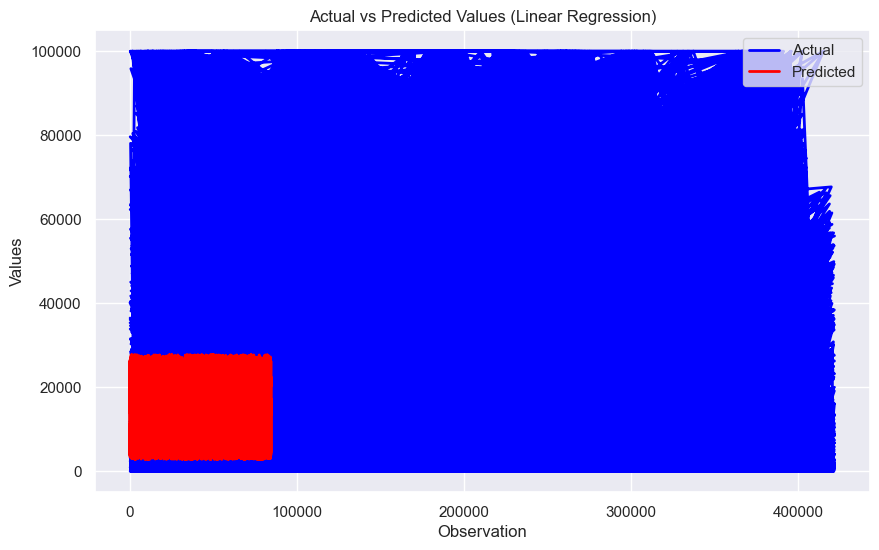

In [72]:
# Line plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted', color='red', linewidth=2)
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()

Mean Squared Error: 32186401.346564487
R-squared: 0.9244059488690654


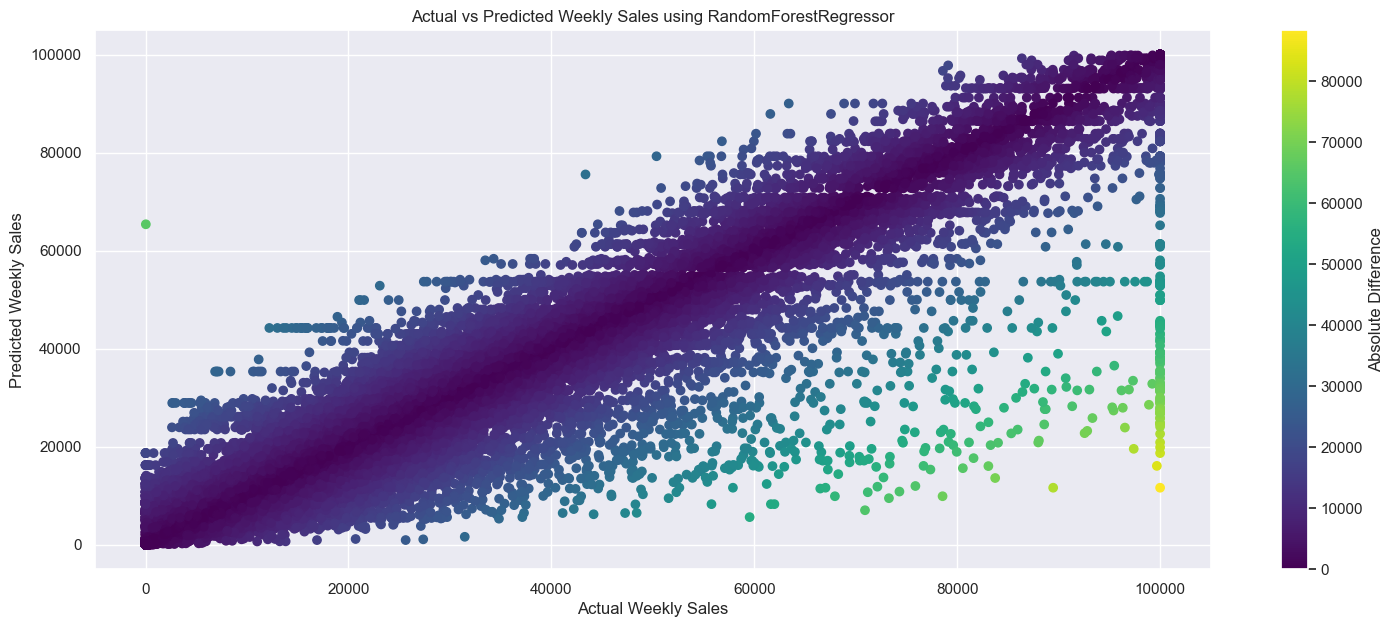

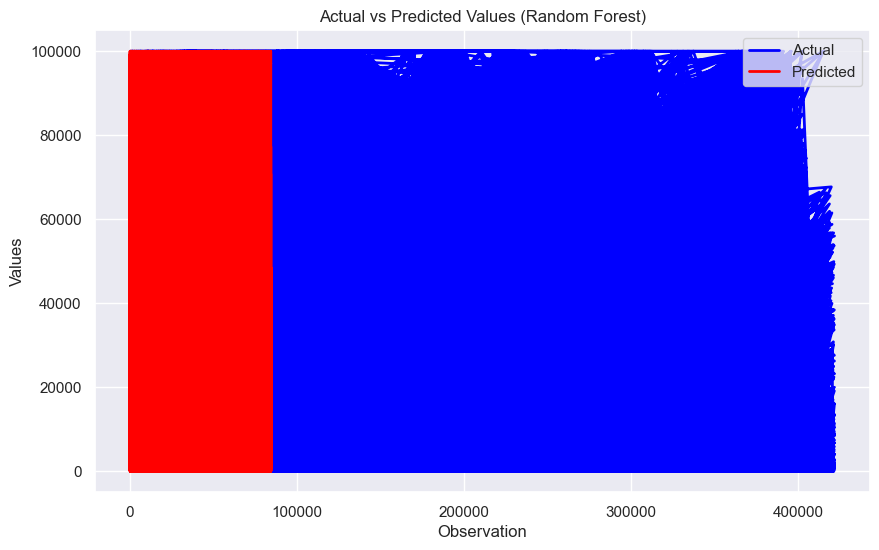

"Line Plot:\n\nThe line plot compares the actual weekly sales (y_test) and the predicted weekly sales (y_pred_rf) for each observation in your test set.\nThe blue line represents the actual values, and the red line represents the predicted values.\nIdeally, you would want the red line to be close to the blue line for most of the observations. Any deviation from the blue line indicates a difference between the actual and predicted values.\nBy plotting both lines on the same graph, you can visually inspect how well your model's predictions align with the actual values."

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 'X' contains the features, and 'y' contains the target variable ('Weekly_Sales')
X = merge_df1.drop('Weekly_Sales', axis=1)  # Features
y = merge_df1['Weekly_Sales']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_rf = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted values
absolute_difference = abs(y_test - y_pred_rf)
plt.scatter(y_test, y_pred_rf, c=absolute_difference, cmap='viridis')
plt.colorbar(label='Absolute Difference')
#plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales using RandomForestRegressor")
plt.show()

# Line plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_rf, label='Predicted', color='red', linewidth=2)
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()
""" visual representation of the relationship between the actual weekly sales (y_test) and the predicted weekly sales (y_pred_rf).
Each point on the scatter plot represents an observation in your test set.
The points are colored based on their position in the plot. If a point is on or close to the diagonal line (45-degree line), 
it means the predicted value is close to the actual value. Points away from the diagonal line indicate differences between actual and predicted values.
In your code, you used plt.scatter(y_test, y_pred_rf) where y_test is on the x-axis and y_pred_rf is on the y-axis. 
Points will be scattered around the diagonal line, and the color indicates how far each point deviates from that line"""

"""Line Plot:

The line plot compares the actual weekly sales (y_test) and the predicted weekly sales (y_pred_rf) for each observation in your test set.
The blue line represents the actual values, and the red line represents the predicted values.
Ideally, you would want the red line to be close to the blue line for most of the observations. Any deviation from the blue line indicates a difference between the actual and predicted values.
By plotting both lines on the same graph, you can visually inspect how well your model's predictions align with the actual values."""

Gradient Boosting Regressor

In [73]:
from xgboost import XGBRegressor

# Create the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)


In [74]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

Mean Absolute Error (XGBoost): 4069.9994591505742
Mean Squared Error (XGBoost): 50578004.700289205
R-squared (XGBoost): 0.8812108184370722


In [50]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 259.2 kB/s eta 0:06:25
   ---------------------------------------- 0.1/99.8 MB 798.9 kB/s eta 0:02:05
   ---------------------------------------- 0.4/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 1.1/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.7/99.8 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.8 MB 7.0 MB/s eta 0:00:14
   - -------------------------------------- 2.8/9

In [75]:
print(merge_df.columns)

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Days_Since_Start'],
      dtype='object')


In [76]:
# Extract relevant columns
sales_holiday = merge_df[['IsHoliday', 'Weekly_Sales']]

# Separate data for holidays and non-holidays
target = [sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday'] == True],
          sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday'] == False]]

labels = ['Not Holiday', ' Holiday']

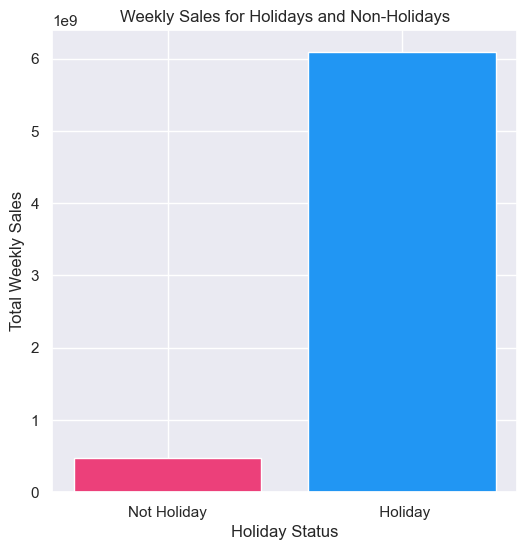

In [77]:
plt.figure(figsize=(6, 6))
plt.bar(labels, [t.sum() for t in target], color=['#EC407A', '#2196F3'])
plt.title('Weekly Sales for Holidays and Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Total Weekly Sales')
plt.show()

Sales on holiday is a little bit more than sales in not-holiday
From this plot, we notice the Department with the highest sales lies between Dept 60 and 80

c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

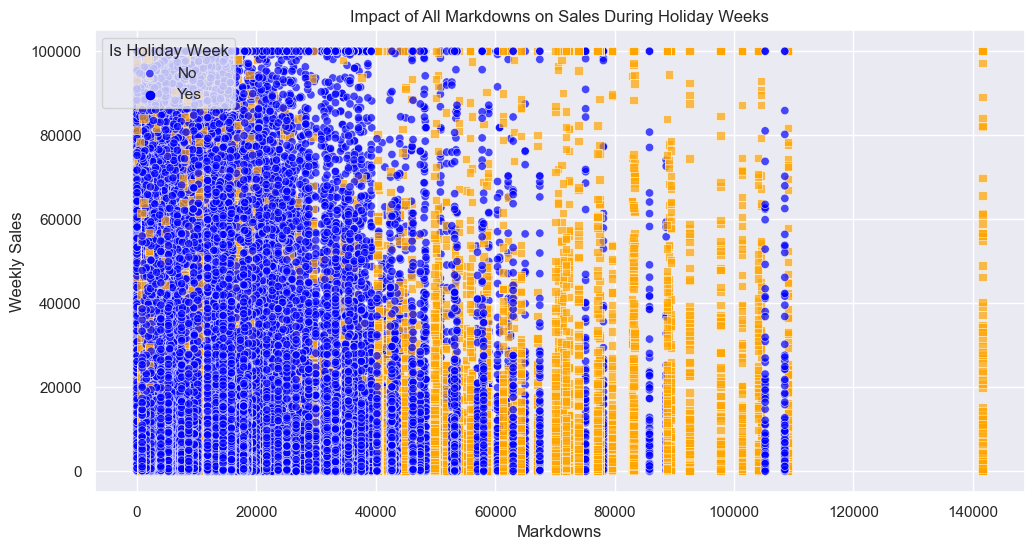

In [85]:
# Visualize the impact of all Markdowns during holiday weeks
plt.figure(figsize=(12, 6))

# Convert 'Is_Holiday_Week' to string to avoid Seaborn error
df_model['Is_Holiday_Week'] = df_model['Is_Holiday_Week'].astype(str)

# Define a vibrant color palette
palette = {'False': 'blue', 'True': 'orange'}

# Separate scatter plots for holiday and non-holiday weeks
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', hue='Is_Holiday_Week', data=df_model, style='Is_Holiday_Week', markers=['o', 's'], palette=palette, alpha=0.7)
sns.scatterplot(x='MarkDown2', y='Weekly_Sales', hue='Is_Holiday_Week', data=df_model, style='Is_Holiday_Week', markers=['o', 's'], palette=palette, alpha=0.7)
sns.scatterplot(x='MarkDown3', y='Weekly_Sales', hue='Is_Holiday_Week', data=df_model, style='Is_Holiday_Week', markers=['o', 's'], palette=palette, alpha=0.7)
sns.scatterplot(x='MarkDown4', y='Weekly_Sales', hue='Is_Holiday_Week', data=df_model, style='Is_Holiday_Week', markers=['o', 's'], palette=palette, alpha=0.7)
sns.scatterplot(x='MarkDown5', y='Weekly_Sales', hue='Is_Holiday_Week', data=df_model, style='Is_Holiday_Week', markers=['o', 's'], palette=palette, alpha=0.7)

plt.title('Impact of All Markdowns on Sales During Holiday Weeks')
plt.xlabel('Markdowns')
plt.ylabel('Weekly Sales')
plt.legend(title='Is Holiday Week', loc='upper left', labels=['No', 'Yes'])
plt.show()

In [275]:
# Create a DataFrame with 'Id' and 'Weekly_Sales' columns
submission_df = pd.DataFrame({
    "Id": merge_df['Store'].astype(str) + '_' + merge_df['Dept'].astype(str) + '_' + merge_df['Date'].astype(str),
    "Weekly_Sales": y_pred_rf
})

# Save the DataFrame to a CSV file
submission_df.to_csv('predicted_sales_submission.csv', index=False)

bool
